This is a long simulation to save the output, run POD and save eigenmodes.


In [1]:
from Forward2d import forwardmodel
import cte_eq
import pickle
import numpy as np
import sys
sys.path.append('./..')
import ProcessFunctions
import matplotlib.pyplot as plt

In [ ]:
drs=0.012
T_final=10500
Specifyinit=False
u_init=0
T_filter=4500 # remove T_filter years before applying the POD
downsampleratio=1 # not downsampling anything
Nxout=cte_eq.Nxout
Ntout=cte_eq.Ntout
RunModel=False
FindPOD=False

In [4]:
if RunModel==True:
    p=forwardmodel(T_final,cte_eq.Ntout,cte_eq.Nxout,Specifyinit,u_init,drs)
    direct='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/2DSim_MainSimulation_Tf'+str(T_final)+"Nx="+str(Nxout)+"Nt="+str(Ntout)+'drs'+str(drs)+".npz"
    v=p.ox["v"]
    theta=p.ox["theta"]
    tau=p.ox["tau"]
    slip=p.ox["slip"]
    t=p.ox["t"]
    a=p.mesh_dict["A"]
    b=p.mesh_dict["B"]
    dc=p.mesh_dict["DC"]
    sigma=p.mesh_dict["SIGMA"]
    np.savez(direct,v=v,theta=theta,tau=tau,slip=slip,t=t,a=a,b=b,dc=dc,sigma=sigma)
else:
    # Load the data
    # direct='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/2DSim_MainSimulation_Tf'+str(T_final)+"Nx="+str(Nxout)+"Nt="+str(Ntout)+'drs'+str(drs)+".npz"
    # data = np.load(direct)
    # v=data['v']
    # theta=data['theta']
    # # tau=data['tau']
    # # slip=data['slip']
    # t=data['t']
    # a=data['a']
    
    # b=data['b']
    # dc=data['dc']
    # sigma=data['sigma']


SyntaxError: unexpected EOF while parsing (904681577.py, line 27)

In [ ]:
Nx=int(a.shape[0]//4)
N_snapshots=0 # is not going to be used in the function
specify_N_snapshots=False

In [5]:
Nx

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/central/groups/astuart/hkaveh/soft/miniconda3/envs/learnmodel/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3552, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_2599055/1064847649.py", line 1, in <module>
    Nx
NameError: name 'Nx' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/central/groups/astuart/hkaveh/soft/miniconda3/envs/learnmodel/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2098, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/central/groups/astuart/hkaveh/soft/miniconda3/envs/learnmodel/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return 

TypeError: object of type 'NoneType' has no len()

In [6]:
# v=np.array(v)
# theta=np.array(theta)

# t=np.array(t)

In [7]:
if FindPOD==True:
    v_or_theta="v"
    U,S,VT,P_bar,Nx,V_ox_filtered,theta_ox_filtered,Nt2,t_ox_filtered=ProcessFunctions.ApplyPODV_2D(v,theta,t,Nx,T_filter,v_or_theta,downsampleratio,N_snapshots,specify_N_snapshots)
    direct1='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(Ntout)+"Nx="+str(Nxout)+'PODonlyonV'+'drs'+str(drs)
    np.savez_compressed(direct1+'.npz', U=U, S=S, VT=VT,q_bar=P_bar)
    v_or_theta="theta"
    U,S,VT,P_bar,Nx,V_ox_filtered,theta_ox_filtered,Nt2,t_ox_filtered=ProcessFunctions.ApplyPODV_2D(v,theta,t,Nx,T_filter,v_or_theta,downsampleratio,N_snapshots,specify_N_snapshots)
    direct2='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(Ntout)+"Nx="+str(Nxout)+'PODonlyontheta'+'drs'+str(drs)
    np.savez_compressed(direct2+'.npz', U=U, S=S, VT=VT,q_bar=P_bar)    
else:
    direct1='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(Ntout)+"Nx="+str(Nxout)+'PODonlyonV'+'drs'+str(drs)
    direct2='/central/groups/astuart/hkaveh/Data/LearnROM/transfer/MainSimulation2D_Tf'+str(T_final)+"Nt="+str(Ntout)+"Nx="+str(Nxout)+'PODonlyontheta'+'drs'+str(drs)


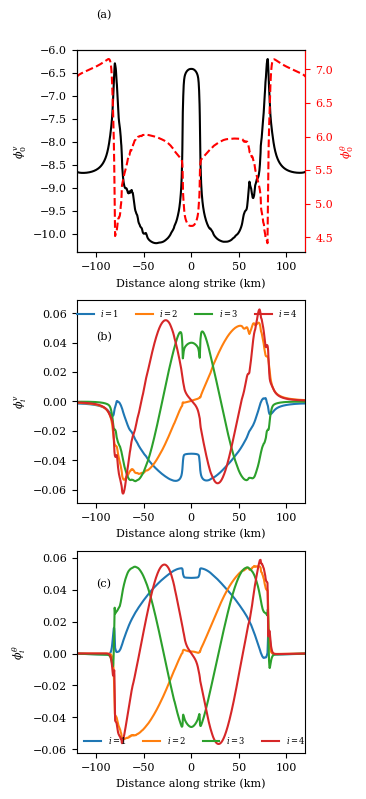

In [9]:

Data_V=np.load(direct1+'.npz')
Data_theta=np.load(direct2+'.npz')
# Plotting the POD components for slip rate and state variable
# making everything serif font
# Set global font family to 'serif' and font size to 14
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8  # You can adjust this value as needed
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
fig,axs=plt.subplots(3,1,figsize=(3.7,8))

Nx=Data_V["U"].shape[0]
x_grid=np.linspace(-cte_eq.L/2,cte_eq.L/2,Nx)/1e3
N_plot=4

# # Plotting on axs[0] two lines with shared x axis but different y axis
axs[0].plot(x_grid,Data_V["q_bar"],color='black',label=r'$v$')
# # make another plot with different y-axis using twinx:
ax2=axs[0].twinx()
ax2.plot(x_grid,Data_theta["q_bar"],color='red',linestyle='--',label=r'$\theta$')
ax2.tick_params('y', colors='r')
ax2.spines['right'].set_color('r')

for i in range(3):
    axs[i].set_xlabel('Distance along strike (km)')
    axs[i].set_xlim(-cte_eq.L/2/1e3,cte_eq.L/2/1e3)
axs[0].set_ylabel(r'$\phi_0^v$')
ax2.set_ylabel(r'$\phi_0^\theta$',color='red')
axs[1].set_ylabel(r'$\phi_i^v$')
axs[2].set_ylabel(r'$\phi_i^\theta$')

for i in range(N_plot):


    axs[1].plot(x_grid,Data_V["U"][:,i],label="$i={}$".format(i+1))
    axs[2].plot(x_grid,Data_theta["U"][:,i],label="$i={}$".format(i+1))
# axs[1].set_ylim(top=0.04)
# axs[2].set_ylim(top=0.04)
axs[1].legend(ncol=4,frameon=False,fontsize=6)
axs[2].legend(ncol=4,frameon=False,fontsize=6)
axs[0].text(-100,-5.3,'(a)')
axs[1].text(-100,0.042,'(b)')
axs[2].text(-100,0.042,'(c)')
plt.tight_layout()

plt.savefig('/central/groups/astuart/hkaveh/Figs/ROM/Eq_PODcomponents.png',dpi=300)

